In [7]:
import collections
from vnpy.app.script_trader import init_cli_trading
from vnpy.app.script_trader.cli import process_log_event
from vnpy.gateway.ib import IbGateway
from time import sleep
from datetime import datetime
import pandas as pd
from vnpy.app.cta_strategy.backtesting import BacktestingEngine
from dual_thrust_strategy import MyDualThrustStrategy

In [8]:
MyDualThrustStrategy.exit_time

datetime.time(14, 55)

In [9]:
a = MyDualThrustStrategy()
a.exit_time

TypeError: __init__() missing 4 required positional arguments: 'cta_engine', 'strategy_name', 'vt_symbol', and 'setting'

In [10]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="MGC.NYMEX",
    interval="1m",
    start=datetime(2007, 12, 12),
    end=datetime(2020, 5, 1),
    rate=0.000028,
    slippage=0.1,
    size=10,
    pricetick=0.1,
    capital=20000,
    collection_name = "MGC"
)
engine.load_data()

2020-06-06 22:18:58.735323	开始加载历史数据
2020-06-06 22:18:58.740320	加载进度： [1%]
2020-06-06 22:18:58.742321	加载进度： [1%]
2020-06-06 22:18:58.743319	加载进度： [2%]
2020-06-06 22:18:58.745318	加载进度： [3%]
2020-06-06 22:18:58.747317	加载进度： [3%]
2020-06-06 22:18:58.749315	加载进度： [4%]
2020-06-06 22:18:58.750315	加载进度： [5%]
2020-06-06 22:18:58.752314	加载进度： [5%]
2020-06-06 22:18:58.753314	加载进度： [6%]
2020-06-06 22:18:58.755313	加载进度： [7%]
2020-06-06 22:18:58.757312	加载进度： [7%]
2020-06-06 22:18:58.758311	加载进度： [8%]
2020-06-06 22:18:58.760311	加载进度： [9%]
2020-06-06 22:18:58.762310	加载进度： [9%]
2020-06-06 22:18:58.763309	加载进度： [10%]
2020-06-06 22:18:58.765308	加载进度：# [11%]
2020-06-06 22:18:58.766307	加载进度：# [11%]
2020-06-06 22:18:58.768307	加载进度：# [12%]
2020-06-06 22:18:58.769306	加载进度：# [13%]
2020-06-06 22:18:58.771306	加载进度：# [13%]
2020-06-06 22:18:58.773304	加载进度：# [14%]
2020-06-06 22:18:58.774303	加载进度：# [15%]
2020-06-06 22:18:58.776303	加载进度：# [15%]
2020-06-06 22:18:58.778302	加载进度：# [16%]
2020-06-06 22:18:58.779302	加载进度：#

In [11]:
class_dict = collections.defaultdict(list)
for class_instance in engine.history_data:
    for key, value in class_instance.__dict__.items():
        class_dict[key].append(value)
frame = pd.DataFrame.from_dict(class_dict)

In [12]:
frame.head(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
0,DB,MGC,Exchange.NYMEX,2011-03-25 00:12:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
1,DB,MGC,Exchange.NYMEX,2011-03-25 01:29:00,Interval.MINUTE,2.0,0.0,1434.7,1434.7,1434.7,1434.7,MGC.NYMEX
2,DB,MGC,Exchange.NYMEX,2011-03-25 01:33:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
3,DB,MGC,Exchange.NYMEX,2011-03-25 02:28:00,Interval.MINUTE,1.0,0.0,1436.5,1436.5,1436.5,1436.5,MGC.NYMEX
4,DB,MGC,Exchange.NYMEX,2011-03-25 03:02:00,Interval.MINUTE,1.0,0.0,1436.2,1436.2,1436.2,1436.2,MGC.NYMEX


In [13]:
frame.tail(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
1189589,DB,MGC,Exchange.NYMEX,2020-01-31 12:33:00,Interval.MINUTE,2.0,0.0,1456.6586,1456.6586,1455.7385,1455.7385,MGC.NYMEX
1189590,DB,MGC,Exchange.NYMEX,2020-01-31 12:36:00,Interval.MINUTE,2.0,0.0,1457.7627,1457.7627,1457.7627,1457.7627,MGC.NYMEX
1189591,DB,MGC,Exchange.NYMEX,2020-01-31 15:22:00,Interval.MINUTE,5.0,0.0,1459.8789,1459.8789,1459.8789,1459.8789,MGC.NYMEX
1189592,DB,MGC,Exchange.NYMEX,2020-01-31 15:24:00,Interval.MINUTE,5.0,0.0,1460.2469,1460.2469,1460.2469,1460.2469,MGC.NYMEX
1189593,DB,MGC,Exchange.NYMEX,2020-01-31 15:59:00,Interval.MINUTE,1.0,0.0,1459.0508,1459.0508,1459.0508,1459.0508,MGC.NYMEX


In [14]:
engine.add_strategy(MyDualThrustStrategy, {})

2020-06-06 22:23:10.540068	策略初始化完成
2020-06-06 22:23:10.541068	开始回放历史数据
2020-06-06 22:23:50.243379	历史数据回放结束
2020-06-06 22:23:50.245339	开始计算逐日盯市盈亏
2020-06-06 22:23:50.305325	逐日盯市盈亏计算完成
2020-06-06 22:23:50.306324	开始计算策略统计指标
2020-06-06 22:23:50.322318	------------------------------
2020-06-06 22:23:50.322318	首个交易日：	2011-04-06
2020-06-06 22:23:50.322318	最后交易日：	2020-01-31
2020-06-06 22:23:50.322318	总交易日：	2744
2020-06-06 22:23:50.322318	盈利交易日：	859
2020-06-06 22:23:50.322318	亏损交易日：	918
2020-06-06 22:23:50.322318	起始资金：	20,000.00
2020-06-06 22:23:50.322318	结束资金：	23,351.07
2020-06-06 22:23:50.322318	总收益率：	16.76%
2020-06-06 22:23:50.322318	年化收益：	1.47%
2020-06-06 22:23:50.322318	最大回撤: 	-2,639.35
2020-06-06 22:23:50.322318	百分比最大回撤: -11.81%
2020-06-06 22:23:50.322318	最长回撤天数: 	497
2020-06-06 22:23:50.322318	总盈亏：	3,351.07
2020-06-06 22:23:50.322318	总手续费：	1,531.95
2020-06-06 22:23:50.322318	总滑点：	4,095.00
2020-06-06 22:23:50.322318	总成交金额：	54,712,640.87
2020-06-06 22:23:50.322318	总成交笔数：	4095
2020-06-06 22

c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

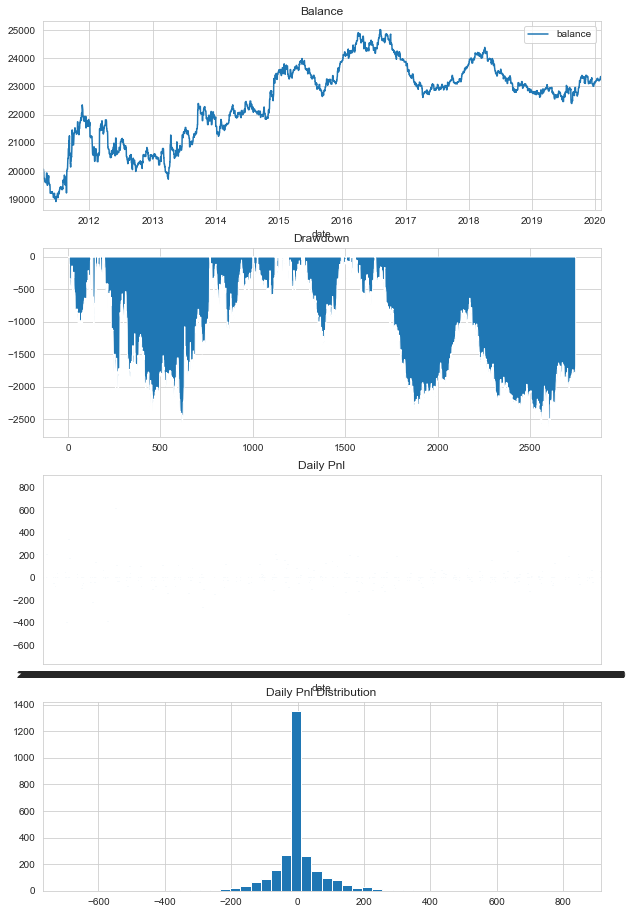

In [16]:
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()